>
> # MaaSSim tutorial

 ### quickstart

In [1]:
import os, sys # add MaaSSim to path (not needed if MaaSSim is already in path)
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

prepare

In [2]:
from MaaSSim.utils import get_config, load_G, prep_supply_and_demand  # simulator
from MaaSSim.data_structures import structures as inData
from MaaSSim.simulators import simulate

In [3]:
params = get_config('../../data/config/default.json')  # load configuration

In [4]:
params.nP = 2  # parameterize supply 
params.nV = 1  # and demand

In [5]:
inData = load_G(inData, params)  # load network graph 

In [6]:
inData = prep_supply_and_demand(inData, params)  # generate supply and demand

simulate

In [7]:
sim = simulate(params = params, inData = inData) # simulate

17-07-24 16:02:55-WARNING-Setting up 1h simulation at 2024-07-17 15:53:56 for 1 vehicles and 2 passengers in Nootdorp, Netherlands
17-07-24 16:02:55-INFO--------------------	Starting simulation	-------------------
17-07-24 16:02:55-INFO-pax    0  got to dest at                           2024-07-17 16:00:45
17-07-24 16:02:55-INFO-pax    1  got to dest at                           2024-07-17 16:18:10
17-07-24 16:02:55-INFO-veh    1  quitted shift                            2024-07-17 18:53:55
17-07-24 16:02:55-INFO--------------------	Simulation over		-------------------
17-07-24 16:02:55-INFO-queue of requests 0
17-07-24 16:02:55-WARNING-simulation time 0.0 s
17-07-24 16:02:55-WARNING-assertion tests for simulation results - passed


### walkthrough

demand structure

In [8]:
inData.requests.head(2)

,pax_id,origin,destination,treq,tdep,ttrav,tarr,tdrop,shareable,schedule_id,dist,platform,ride_id,position,sim_schedule
pax,,,,,,,,,,,,,,,
0,0,520820370,45012428,2024-07-17 15:53:56,NaN,0 days 00:01:58,2024-07-17 15:55:54,NaN,False,NaN,1182,0,0,0,node time req_id od 0 N...
1,1,45014758,44977983,2024-07-17 16:14:04,NaN,0 days 00:01:57,2024-07-17 16:16:01,NaN,False,NaN,1171,0,1,0,node time req_id od 0 NaN...


In [9]:
inData.vehicles.head(2)

,pos,event,shift_start,shift_end,platform,expected_income
veh,,,,,,
1,44977983,driverEvent.ENDS_SHIFT,0,86400,0,NaN


In [10]:
inData.passengers.head(2)

,pos,event,platforms
pax,,,
0,520820370,NaN,[0]
1,45014758,NaN,[0]


#### visualize the demand

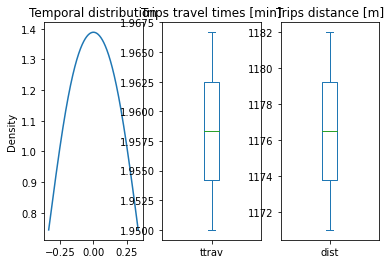

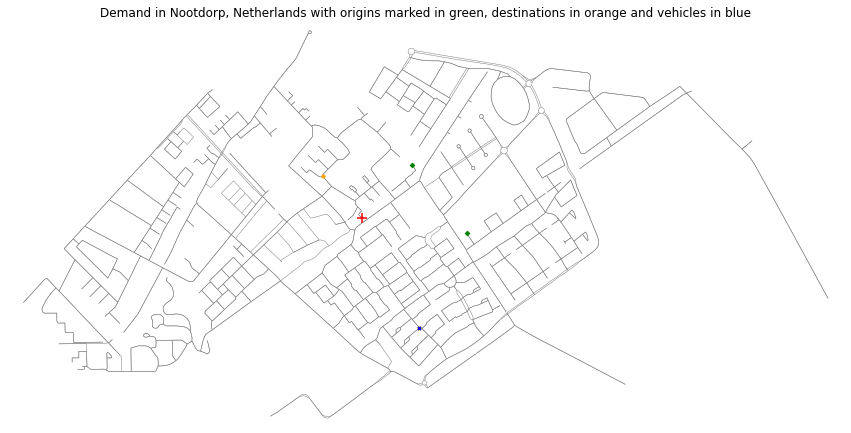

In [11]:
#import matplotlib.pyplot as plt
#inData.requests['dist'] = [inData.skim[request.origin]
#                           [request.destination] for _, request in inData.requests.iterrows()]     
from MaaSSim.visualizations import plot_demand
plot_demand(inData, vehicles = True, s = 10, params = params)

#### results (raw)

In [12]:
list(sim.runs.keys()) #consecutive runs

[0]

In [13]:
list(sim.runs[0].keys()) # single run results

['trips', 'outcomes', 'rides', 'queues']

passengers raw results

In [14]:
sim.runs[0].trips.head(10) #trip segment reports

,pax,pos,t,event,veh_id
0,0,520820370,0,STARTS_DAY,NaN
1,0,520820370,0,REQUESTS_RIDE,NaN
2,0,520820370,0,RECEIVES_OFFER,NaN
3,0,520820370,15,ACCEPTS_OFFER,NaN
4,0,520820370,35,ARRIVES_AT_PICKUP,1.0
5,0,520820370,251,MEETS_DRIVER_AT_PICKUP,1.0
6,0,520820370,281,DEPARTS_FROM_PICKUP,1.0
7,0,45012428,399,ARRIVES_AT_DROPOFF,1.0
8,0,45012428,409,SETS_OFF_FOR_DEST,NaN
9,0,45012428,409,ARRIVES_AT_DEST,NaN


vehicles raw results

In [15]:
df = sim.runs[0].rides
df[df.veh == 1]

,veh,pos,t,event,paxes
0,1,6.166245e+09,0,STARTS_DAY,[]
1,1,6.166245e+09,0,OPENS_APP,[]
2,1,6.166245e+09,0,RECEIVES_REQUEST,[]
3,1,6.166245e+09,15,ACCEPTS_REQUEST,[]
4,1,6.166245e+09,35,IS_ACCEPTED_BY_TRAVELLER,[]
5,1,5.208204e+08,251,ARRIVES_AT_PICKUP,[]
6,1,5.208204e+08,251,MEETS_TRAVELLER_AT_PICKUP,[]
7,1,5.208204e+08,281,DEPARTS_FROM_PICKUP,[0]
8,1,4.501243e+07,399,ARRIVES_AT_DROPOFF,[0]
9,1,4.501243e+07,1208,RECEIVES_REQUEST,[]


### visualization

In [16]:
df = sim.runs[0].trips
df = df[df.pax == 1]
df

,pax,pos,t,event,veh_id
0,1,45014758,0,STARTS_DAY,NaN
1,1,45014758,1208,REQUESTS_RIDE,NaN
2,1,45014758,1208,RECEIVES_OFFER,NaN
3,1,45014758,1223,ACCEPTS_OFFER,NaN
4,1,45014758,1243,ARRIVES_AT_PICKUP,1.0
5,1,45014758,1297,MEETS_DRIVER_AT_PICKUP,1.0
6,1,45014758,1327,DEPARTS_FROM_PICKUP,1.0
7,1,44977983,1444,ARRIVES_AT_DROPOFF,1.0
8,1,44977983,1454,SETS_OFF_FOR_DEST,NaN
9,1,44977983,1454,ARRIVES_AT_DEST,NaN


<AxesSubplot:>

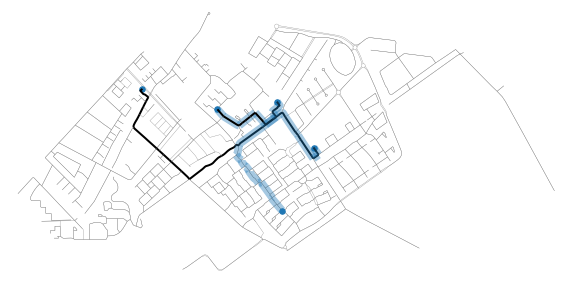

In [17]:
from MaaSSim.visualizations import plot_veh
df = sim.runs[0].rides
plot_veh(inData.G, df[df.veh ==1])

### results processed

In [18]:
sim.output() # call to generate reports

In [19]:
list(sim.res[0].keys())

['pax_exp', 'pax_kpi', 'veh_exp', 'veh_kpi']

In [20]:
sim.res[0].pax_kpi

,ACCEPTS_OFFER,ARRIVES_AT_DROPOFF,ARRIVES_AT_PICKUP,DEPARTS_FROM_PICKUP,MEETS_DRIVER_AT_PICKUP,REQUESTS_RIDE,SETS_OFF_FOR_DEST,STARTS_DAY,RECEIVES_OFFER,IS_REJECTED_BY_VEHICLE,REJECTS_OFFER,ARRIVES_AT_DEST,PREFERS_OTHER_SERVICE,LOSES_PATIENCE,TRAVEL,WAIT,OPERATIONS,nP
sum,30.0,235.000000,40.0,60.0,270.000000,1208.000000,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,235.000000,270.000000,110.0,2
mean,15.0,117.500000,20.0,30.0,135.000000,604.000000,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.500000,135.000000,55.0,2
std,0.0,0.707107,0.0,0.0,114.551299,854.184992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.707107,114.551299,0.0,2


In [21]:
sim.res[0].veh_kpi.T.head(1)

,sum,mean,std
nRIDES,2.0,2.0,NaN


In [22]:
sim.res[0].veh_exp

,nRIDES,nREJECTED,OUT,STARTS_DAY,OPENS_APP,RECEIVES_REQUEST,ACCEPTS_REQUEST,REJECTS_REQUEST,IS_ACCEPTED_BY_TRAVELLER,IS_REJECTED_BY_TRAVELLER,...,REPOSITIONED,DECIDES_NOT_TO_DRIVE,ENDS_SHIFT,TRAVEL,WAIT,CRUISE,OPERATIONS,IDLE,PAX_KM,REVENUE
veh,,,,,,,,,,,,,,,,,,,,,
1,2,0.0,False,0,0,809.0,30.0,0,40.0,0,...,0,0,9355.0,235.0,0,270.0,130.0,8720.0,2.353,2.353


In [23]:
sim.res[0].pax_exp.tail()

,ACCEPTS_OFFER,ARRIVES_AT_DROPOFF,ARRIVES_AT_PICKUP,DEPARTS_FROM_PICKUP,MEETS_DRIVER_AT_PICKUP,REQUESTS_RIDE,SETS_OFF_FOR_DEST,STARTS_DAY,RECEIVES_OFFER,IS_REJECTED_BY_VEHICLE,REJECTS_OFFER,ARRIVES_AT_DEST,PREFERS_OTHER_SERVICE,LOSES_PATIENCE,TRAVEL,WAIT,OPERATIONS
pax,,,,,,,,,,,,,,,,,
0,15.0,118.0,20.0,30.0,216.0,0.0,10.0,0,0,0,0,0,0,0,118.0,216.0,55.0
1,15.0,117.0,20.0,30.0,54.0,1208.0,10.0,0,0,0,0,0,0,0,117.0,54.0,55.0


-----